![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "Sacramentorealestatetransactions.csv"
df = pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
# Check the nun value

df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [4]:
#To have a brife overview of the whole data

df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


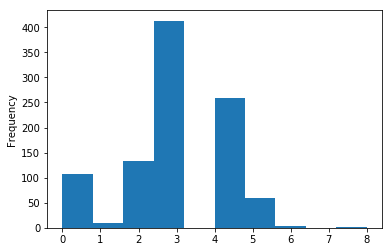

In [5]:
# Check the distribution of beds
df['beds'].plot(kind='hist');

In [6]:
# values related to beds

df[['beds']].describe()

,beds
count,985.000000
mean,2.911675
std,1.307932
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,8.000000


In [7]:
# Find the values which beds less than 1

df.loc[df['beds']<1, ['beds','baths','type','price']]

,beds,baths,type,price
73,0,0,Residential,206000
89,0,0,Residential,244500
100,0,0,Residential,263500
121,0,0,Residential,320000
126,0,0,Residential,339500
133,0,0,Residential,370000
147,0,0,Residential,445000
153,0,0,Residential,585000
169,0,0,Residential,97750
192,0,0,Condo,145000


In [8]:
# set-up the index of beds==0
drop_index = df[df['beds']==0].index
drop_index

Int64Index([ 73,  89, 100, 121, 126, 133, 147, 153, 169, 192,
            ...
            848, 859, 861, 862, 888, 901, 917, 934, 947, 970],
           dtype='int64', length=108)

In [9]:
# Drop the rows where beds == 0

df.drop(drop_index, inplace=True)

df[df['beds']==0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [10]:
# Check the data again
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,95757.114025,3.270239,1.995439,1476.844926,239877.896237,38.590680,-121.362142
std,84.820726,0.864675,0.680771,760.257110,130165.212763,0.132885,0.137115
min,95603.000000,1.000000,1.000000,0.000000,1551.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1093.000000,150000.000000,38.477568,-121.448283
50%,95815.000000,3.000000,2.000000,1373.000000,215000.000000,38.618019,-121.386962
75%,95828.000000,4.000000,2.000000,1800.000000,297500.000000,38.684790,-121.310667
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [11]:
# Findout the sq__ft ==0, and try to clean the data.

df.loc[df['sq__ft'] ==0, ['beds', 'baths', 'sq__ft','price']]

,beds,baths,sq__ft,price
132,3,2,0,352000
154,4,3,0,600000
155,4,3,0,606238
157,6,5,0,830000
223,3,1,0,201000
224,4,2,0,202500
227,3,2,0,205000
230,2,2,0,210000
262,4,2,0,261800
278,4,4,0,297500


In [12]:
#group the sq__ft by beds and baths, replace the value by the mean value according to the beds and baths.

df_group =df[['sq__ft','beds','baths']].groupby(['beds','baths']).mean()

In [13]:
df_group

sq__ft
beds baths             
1    1       730.700000
2    1       914.205128
     2      1004.037037
     3      1788.000000
3    1      1160.269663
     2      1357.987138
     3      1647.416667
     4      5822.000000
4    1      1483.666667
     2      1620.408046
     3      2067.890411
     4      2343.750000
5    2      2341.400000
     3      2393.777778
     4      2795.000000
     5      2846.000000
6    3      2555.000000
     4      2475.000000
     5         0.000000
8    4      3612.000000

In [14]:
# Define the funtion to replace the value of sq_ft according to the beds and baths

def deal_sq_ft(cols):
    sq__ft = cols['sq__ft']
    beds = cols['beds']
    baths = cols['baths']
    
    if sq__ft ==0:

        if (beds == 1 & baths ==1):
            return 730.700000
        if beds == 2:
            if baths ==1:
                return 914.205128
            if baths ==2:
                return 1004.037037
            if baths ==3:
                return 1788.000000
        
        if beds == 3:
            if baths ==1:
                return 1160.269663
            if baths ==2:
                return 1357.987138
            if baths ==3:
                return 1647.416667
            if baths ==4:
                return 5822.000000
            
        if beds == 4:
            if baths ==1:
                return 1483.666667
            if baths ==2:
                return 1620.408046
            if baths ==3:
                return 2067.890411
            if baths ==4:
                return 2343.750000
        
        if beds == 5:
            if baths ==2:
                return 2341.400000
            if baths ==3:
                return 2393.777778
            if baths ==4:
                return 2795.000000
            if baths ==5:
                return 2846.000000
            
        if beds == 6:
            if baths ==3:
                return 2555.000000
            if baths ==4:
                return 2475.000000
            if baths ==5:
                return 2795.000000
          
        if beds == 8:
            
            return 3612.000000
    else:
        return sq__ft
        

In [15]:
# Inplace the value of sq__ft according to different beds and baths

df['sq__ft'] = df[['sq__ft','beds','baths']].apply(deal_sq_ft, axis=1)

In [16]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,95757.114025,3.270239,1.995439,1598.648971,239877.896237,38.590680,-121.362142
std,84.820726,0.864675,0.680771,653.102331,130165.212763,0.132885,0.137115
min,95603.000000,1.000000,1.000000,484.000000,1551.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1152.000000,150000.000000,38.477568,-121.448283
50%,95815.000000,3.000000,2.000000,1428.000000,215000.000000,38.618019,-121.386962
75%,95828.000000,4.000000,2.000000,1871.000000,297500.000000,38.684790,-121.310667
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [17]:
import myfunc_pd as mf
import myfunc_plotting as mp

In [18]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [19]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [20]:
# Find the outliers 
for i in df[['zip', 'beds', 'baths', 'sq__ft', 'price', 'latitude', 'longitude']]:
    #print(i)
    print('Outlier in column ', i, 'is:', mf.outlier_detect(df[i]))

Outlier in column  zip is: []
Outlier in column  beds is: [8, 6, 6, 6]
Outlier in column  baths is: [5, 5]
Outlier in column  sq__ft is: [3612.0, 3599.0, 3615.0, 3746.0, 3992.0, 3881.0, 3984.0, 3838.0, 4303.0, 4246.0, 3741.0, 3788.0, 3670.0, 3863.0, 3579.0, 4400.0, 5822.0]
Outlier in column  price is: [660000, 830000, 680000, 699000, 839000, 636000, 668365, 676200, 677048, 691659, 760000, 879000, 884790]
Outlier in column  latitude is: [39.008159]
Outlier in column  longitude is: [-120.603872, -120.60476000000001, -120.908822, -120.79425400000001, -120.860243, -120.848157, -120.784145, -120.816676, -120.879176, -120.74803899999999, -120.910963, -120.597599, -120.844118, -120.810235, -120.802458, -120.69364099999999, -120.8754]


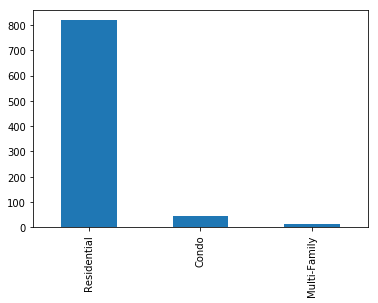

In [21]:
# different types distribution

df['type'].value_counts().plot(kind='bar');

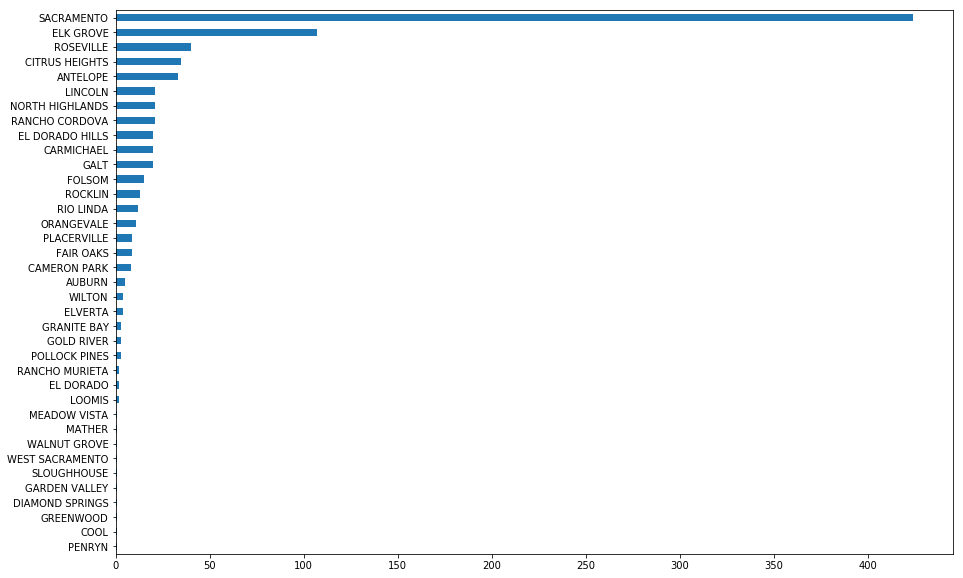

In [22]:
# The defination of different city

df['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [23]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[38.575764, -121.478851], tiles="Mapbox Bright", zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(df.head(1000))):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [24]:
# ANSWER
# Price is target varaible. Based on other predictor variables we'll predict price.

#### 2.2 List all possible variables which might be Predictor variable.

In [25]:
# ANSWER

## beds
## baths
## sqft
## Type
Y = df['price']
X = df['beds']

In [26]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();

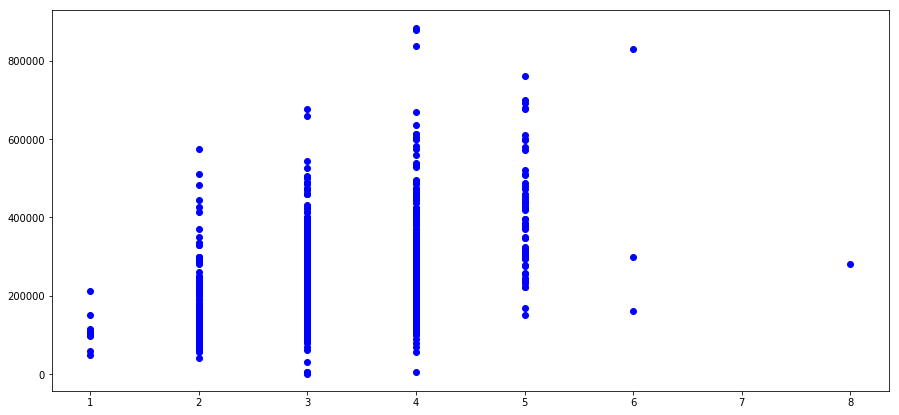

In [27]:
draw_scatter_plot(df['beds'], df['price'])

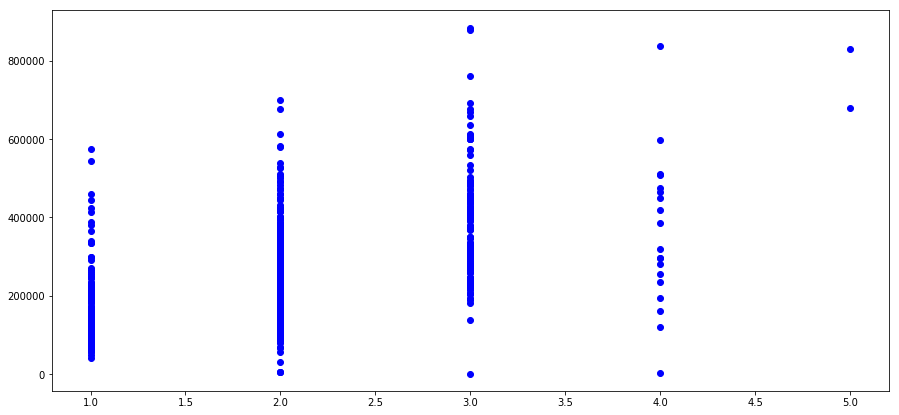

In [28]:
draw_scatter_plot(df['baths'], df['price'])

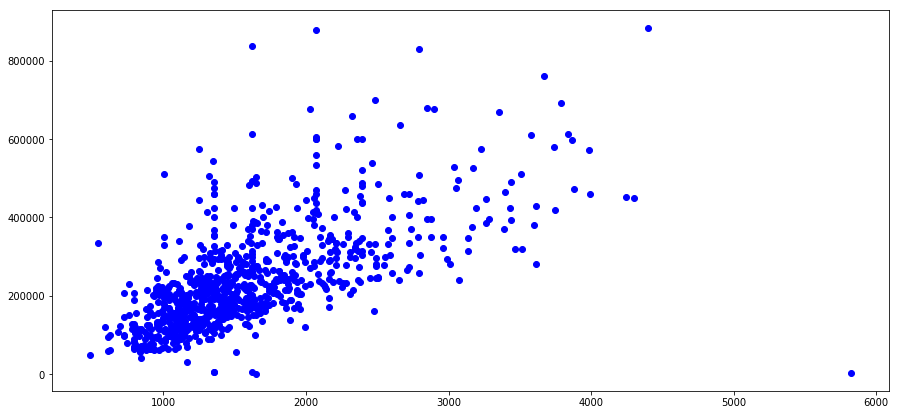

In [29]:
draw_scatter_plot(df['sq__ft'], df['price'])

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [30]:
# ANSWER
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072610,-0.119378,-0.094363,-0.217612,-0.205128,-0.534790
beds,-0.072610,1.000000,0.659514,0.705917,0.450966,-0.055823,0.077586
baths,-0.119378,0.659514,1.000000,0.724286,0.524377,-0.004684,0.156539
sq__ft,-0.094363,0.705917,0.724286,1.000000,0.651345,-0.079027,0.120310
price,-0.217612,0.450966,0.524377,0.651345,1.000000,0.131900,0.354499
latitude,-0.205128,-0.055823,-0.004684,-0.079027,0.131900,1.000000,0.392111
longitude,-0.534790,0.077586,0.156539,0.120310,0.354499,0.392111,1.000000


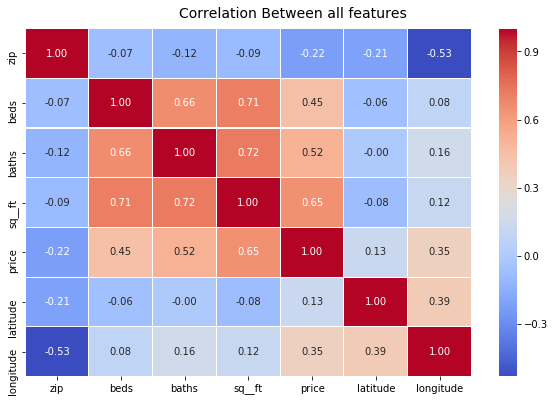

In [31]:
mp.heat_map_plot(df, 'Correlation Between all features ')

In [32]:
#sq__ft is the highest correlated with price, which could be the best predictor.

#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [35]:
# ANSWER
df['y_hat'] = df['price'].mean()

In [36]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,239877.896237
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,239877.896237
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,239877.896237
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,239877.896237
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,239877.896237


In [37]:
X = df['sq__ft']
Y = df['price']
Yhat = df['y_hat']

#Yhat

In [38]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

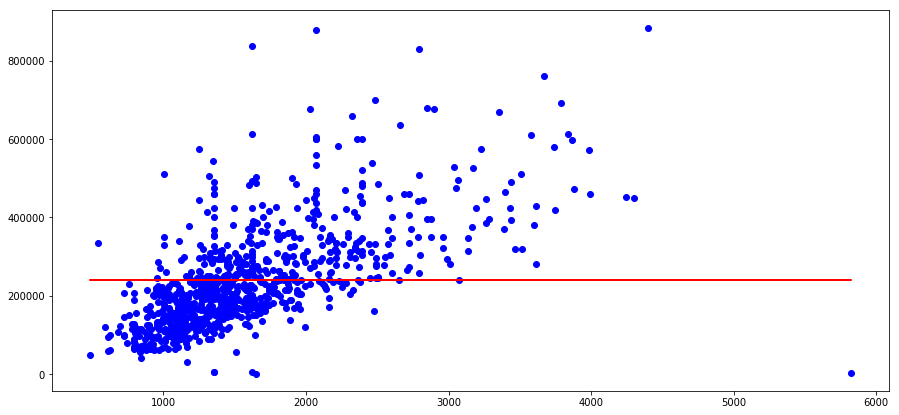

In [39]:
draw_plot(X, Y, Yhat)

#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [40]:
# ANSWER
res = abs(df['price'] - df['y_hat']).mean()
res

96939.00067998929

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [41]:
# ANSWER
X = df['sq__ft']
Y = df['price']

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [44]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    #d = np.sum(np.square(X - Xbar)) 
    d = np.sum((X - Xbar)**2)
    
    beta_1 = n/d
    
    return beta_1

In [45]:
beta_1 = calculate_beta_1(X, Y)
beta_1

129.81489471277982

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [47]:
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    
    Ybar = Y.mean()
    
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [48]:
beta_0= calculate_beta_0(X,Y)
beta_0

32349.448324460653

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [49]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [51]:
Yhat = calculate_yhat(X, beta_0, beta_1)

In [52]:
Yhat

0      140874.700304
1      183843.430454
2      135682.104516
3      142951.738620
4      135811.919411
5      178001.760192
6      175665.092087
7      185141.579401
8      154505.264249
9      181117.317665
10     150351.187618
11     199680.847609
12     145418.221619
13     164760.640931
14     165020.270721
15     179559.538929
16     141913.219462
17     135552.289621
18     108680.606416
19     208378.445555
20     177482.500613
21     204873.443398
22     193319.917768
23     240183.094760
24     149312.668461
25     173588.053772
26     157361.191933
27     177612.315508
28     211494.003028
29     194358.436926
           ...      
954    135552.289621
955    210325.668976
956    202406.960398
957    196175.845452
958    258227.365125
959    229278.643604
960    220581.045658
961    216167.339238
962    147625.074829
963    276661.080174
964    201368.441240
965    216426.969027
966    208636.405665
967    203575.294451
968    262121.811966
969    243558.282022
971    167356

##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [53]:
# ANSWER
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [54]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0       81652.700304
1      115631.430454
2       66802.104516
3       73644.738620
4       53911.919411
5       88080.760192
6       84770.092087
7       94139.579401
8       59600.264249
9       82180.317665
10      50042.187618
11      93430.847609
12      38566.221619
13      57258.640931
14      56270.270721
15      68859.538929
16      28650.219462
17      19302.289621
18      11319.393584
19      86748.445555
20      55482.500613
21      82191.443398
22      70319.917768
23     116083.094760
24      24312.668461
25      46948.053772
26      30080.191933
27      48612.315508
28      80294.003028
29      62358.436926
           ...      
954     72420.710379
955      2075.668976
956      5911.039602
957     13171.154548
958     46727.365125
959     17278.643604
960      7581.045658
961       167.339238
962     68395.925171
963     57661.080174
964     18425.558760
965      3573.030973
966     11363.594335
967     16424.705549
968     42121.811966
969     20558.282022
971     56643

##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [63]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [64]:
def calculate_residula_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [65]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residula_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [66]:
calculate_r_square(Y, np.mean(Y))

0.0

In [67]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.42424980673376034

##### 2.5.G [BONUS] Draw Plot of Predicted Line

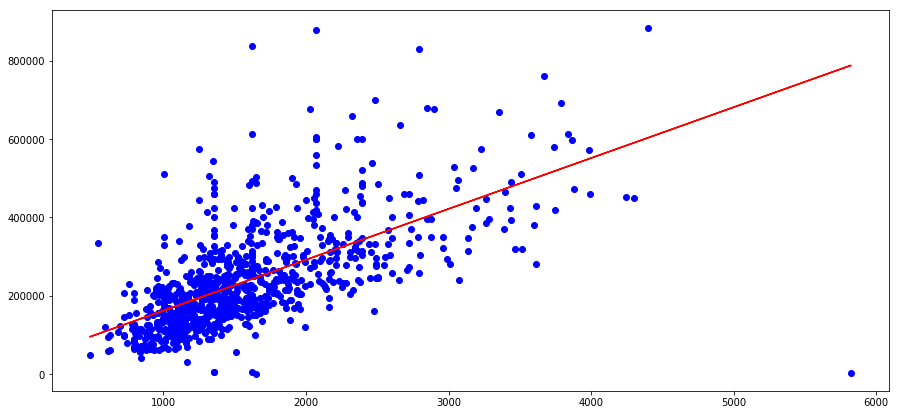

In [68]:
# ANSWER
draw_plot(X, Y, Yhat)

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

In [69]:
# ANSWER

df['Yhat'] = Yhat
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat,Yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,239877.896237,140874.700304
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,239877.896237,183843.430454
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,239877.896237,135682.104516
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,239877.896237,142951.738620
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,239877.896237,135811.919411


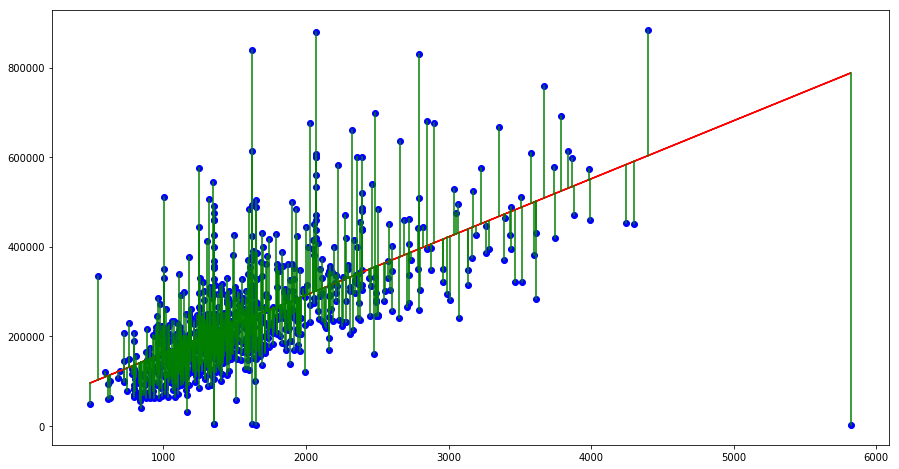

In [70]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [71]:
# ANSWER
xpred = 1024

In [72]:
beta_0

32349.448324460653

In [73]:
beta_1

129.81489471277982

In [74]:
Ypred = beta_1 * xpred + beta_0
print(f"The predicted price for this house is: {Ypred}")

The predicted price for this house is: 165279.9005103472


In [75]:
### Another try using sklearn

In [76]:
from sklearn.linear_model import LinearRegression

In [78]:

X = df[['sq__ft']]
Y = df['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[129.81489471] 32349.44832446077


In [79]:
linreg.score(X, Y)

0.4242498067337602

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [82]:
## Check training/test data

# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'pandas.core.frame.DataFrame'>
X_train has %d rows (701, 1)

Sample of X_train__________________________________________________
     sq__ft
746  1520.0
485  1559.0
428  1872.0
448  1187.0
729  1915.0
666  1199.0
24    901.0
952  1296.0
199  1364.0
260  1595.0

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (701,)

Sample of y_train__________________________________________________
746    255000
485    285000
428    213675
448    234000
729    240000
666    178000
24     125000
952    205900
199    150000
260    260000
Name: price, dtype: int64


In [84]:
## Check training/test data

# About test
print('X_test is a %s' % type(X_test))
print('X_test has %d rows', X_test.shape)
print('')
print('Sample of X_test%s' % ('_'*50))
print(X_test[:10])

print('')
print('y_test is a %s' % type(y_test))
print('y_test has %d rows', y_test.shape)
print('')
print('Sample of y_test%s' % ('_'*50))
print(y_test[:10])

X_test is a <class 'pandas.core.frame.DataFrame'>
X_test has %d rows (176, 1)

Sample of X_test__________________________________________________
          sq__ft
933   960.000000
973  1357.987138
343   924.000000
59   1851.000000
230  1004.037037
296  2159.000000
960  1450.000000
287  2393.777778
535  4246.000000
259  2170.000000

y_test is a <class 'pandas.core.series.Series'>
y_test has %d rows (176,)

Sample of y_test__________________________________________________
933    185000
973    224500
343     77000
59     182587
230    210000
296    345000
960    213000
287    315000
535    452000
259    257729
Name: price, dtype: int64


In [85]:
# ANSWER

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[130.60346001] 28801.2549339369


In [86]:
linreg.score(X_test, y_test)

0.4975019707446075

In [87]:
# ANSWER
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1000

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  159404.7149402739


In [88]:
# ANSWER
x = [[1000]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  159404.7149402739
